In [1]:
# packages

# standard
import numpy as np
import pandas as pd

# plot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_csv("C:/Users/jpsha/Documents/capstone/crc.txt", sep='\t')
df

,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,GSM877126,62.0,A,Male,Left,108.0,0.0,1.0,0.0,NaN,NaN,NaN
1,GSM877127,77.0,B,Male,Left,40.0,1.0,1.0,0.0,NaN,NaN,NaN
2,GSM877128,66.0,C,Female,Left,49.0,0.0,1.0,0.0,NaN,NaN,NaN
3,GSM877129,72.0,D,Female,Left,45.0,0.0,1.0,1.0,NaN,NaN,NaN
4,GSM877130,75.0,C,Male,Left,40.0,0.0,0.0,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
58,GSM877185,48.0,D,Male,Right,64.0,0.0,1.0,0.0,NaN,NaN,NaN
59,GSM877186,65.0,C,Male,Left,25.0,1.0,1.0,0.0,NaN,NaN,NaN
60,GSM877187,71.0,A,Male,Rectum,58.0,1.0,1.0,0.0,NaN,NaN,NaN
61,GSM877188,57.0,A,Male,Rectum,68.0,1.0,0.0,0.0,NaN,NaN,NaN


In [3]:
df = df.drop('Unnamed: 9', axis=1)
df = df.drop('Unnamed: 10', axis=1)
df = df.drop('Unnamed: 11', axis=1)
df = df.drop(index=62, axis=0)
df

,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem
0,GSM877126,62.0,A,Male,Left,108.0,0.0,1.0,0.0
1,GSM877127,77.0,B,Male,Left,40.0,1.0,1.0,0.0
2,GSM877128,66.0,C,Female,Left,49.0,0.0,1.0,0.0
3,GSM877129,72.0,D,Female,Left,45.0,0.0,1.0,1.0
4,GSM877130,75.0,C,Male,Left,40.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
57,GSM877184,54.0,C,Male,Left,22.0,1.0,0.0,0.0
58,GSM877185,48.0,D,Male,Right,64.0,0.0,1.0,0.0
59,GSM877186,65.0,C,Male,Left,25.0,1.0,1.0,0.0
60,GSM877187,71.0,A,Male,Rectum,58.0,1.0,1.0,0.0


In [4]:
# structure of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_REF           62 non-null     object 
 1   Age (in years)   62 non-null     float64
 2   Dukes Stage      62 non-null     object 
 3   Gender           62 non-null     object 
 4   Location         62 non-null     object 
 5   DFS (in months)  62 non-null     float64
 6   DFS event        62 non-null     float64
 7   Adj_Radio        62 non-null     float64
 8   Adj_Chem         62 non-null     float64
dtypes: float64(5), object(4)
memory usage: 4.5+ KB


In [5]:
features_num = ['Age (in years)', 'DFS (in months)']

In [6]:
# basic stats
df[features_num].describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Age (in years),DFS (in months)
count,62.000000,62.000000
mean,61.112903,41.774194
std,9.581582,26.288076
min,28.000000,4.000000
10%,49.100000,14.100000
25%,56.250000,19.500000
50%,62.000000,38.000000
75%,67.000000,57.500000
90%,72.900000,80.900000
max,78.000000,108.000000


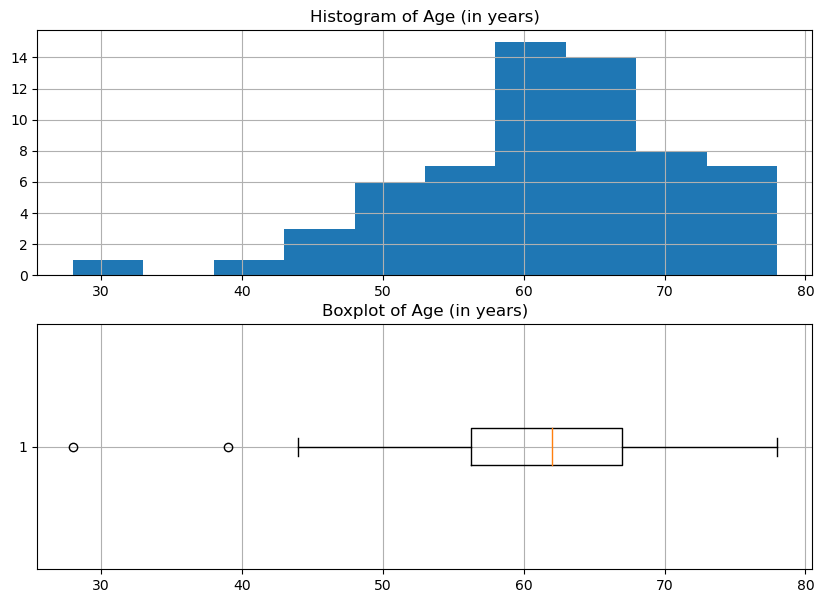

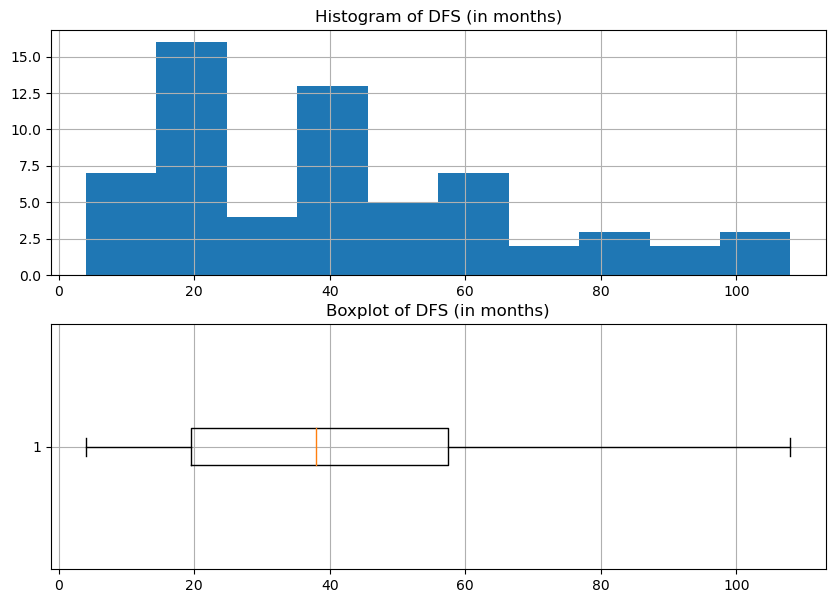

In [7]:
# plot distributions
for f in features_num:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7))
    
    ax1.hist(df[f])
    ax1.grid()
    ax1.set_title('Histogram of ' + f)
    
    ax2.boxplot(df[f], vert=False)
    ax2.grid()   
    ax2.set_title('Boxplot of ' + f)
    
    plt.show()

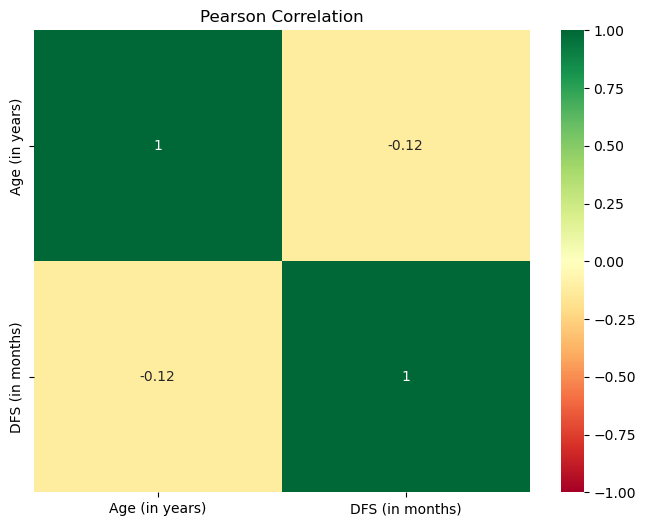

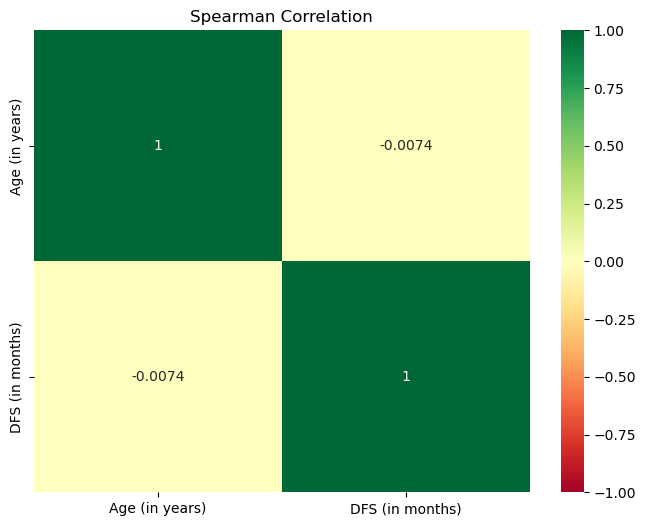

In [8]:
# correlations
corr_pearson = df[features_num].corr(method='pearson')
corr_spearman = df[features_num].corr(method='spearman')

fig = plt.figure(figsize = (8,6))
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')
plt.show()

fig = plt.figure(figsize = (8,6))
sns.heatmap(corr_spearman, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

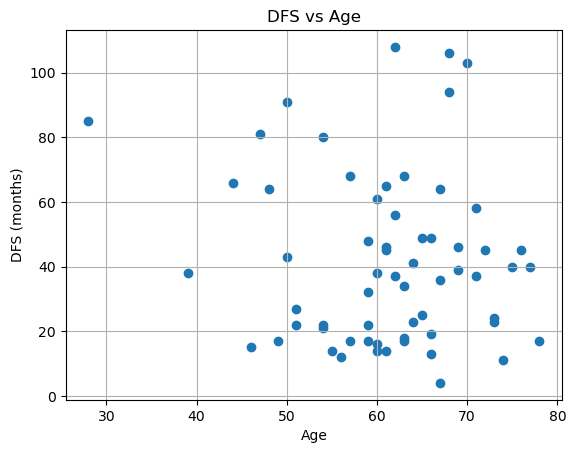

In [9]:
plt.scatter(df['Age (in years)'], df['DFS (in months)'])
plt.title('DFS vs Age')
plt.xlabel('Age')
plt.ylabel('DFS (months)')
plt.grid()
plt.show()

In [10]:
features_cat = ['Dukes Stage', 'Gender', 'Location', 
                'DFS event', 'Adj_Radio', 'Adj_Chem']

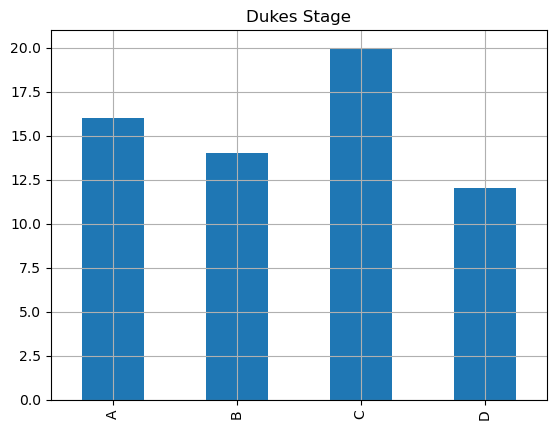

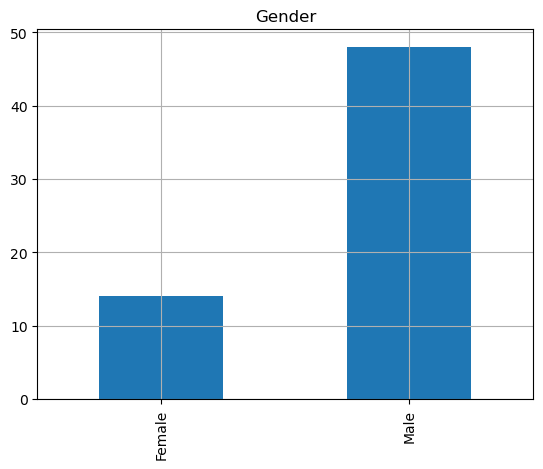

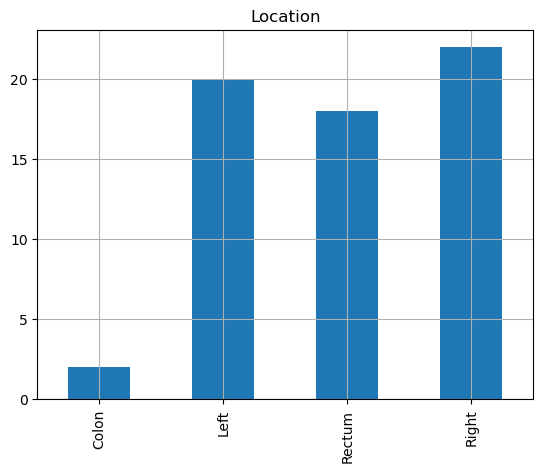

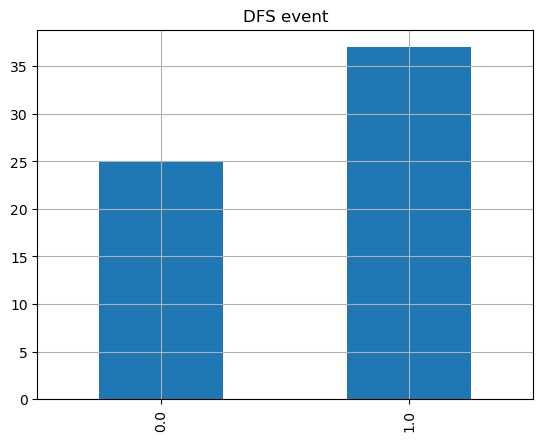

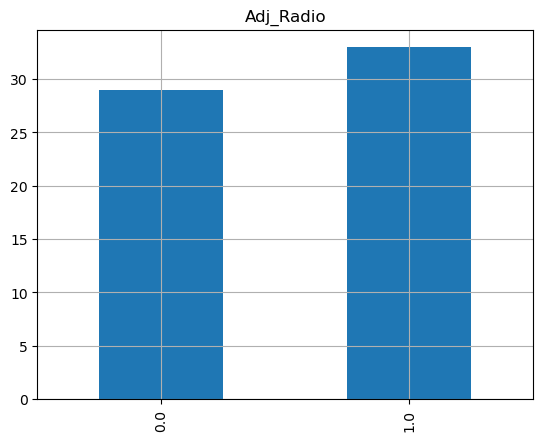

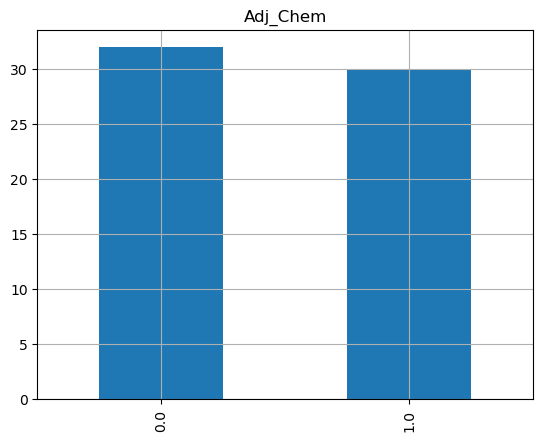

In [11]:
for f in features_cat:
    df[f].value_counts().sort_index().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

In [12]:
# load data
df_gene = pd.read_csv("C:/Users/jpsha/Documents/capstone/crc_ge.txt", 
                      sep='\t')
df_gene.head()

,ID_REF,GSM877126,GSM877127,GSM877128,GSM877129,GSM877130,GSM877131,GSM877132,GSM877133,GSM877134,...,GSM877179,GSM877180,GSM877181,GSM877182,GSM877183,GSM877184,GSM877185,GSM877186,GSM877187,GSM877188
0,117_at,6.029834,6.344321,5.023127,4.612727,5.865944,6.863884,5.430316,4.285183,4.903302,...,5.111097,4.894901,6.660386,5.407188,7.228848,4.835558,5.694010,8.661629,5.702601,4.500368
1,1007_s_at,9.468893,9.994204,10.409823,10.596921,10.252547,9.671754,10.863276,9.788300,10.551750,...,10.084649,10.353849,10.584126,10.585953,9.579042,10.343581,9.409749,10.427298,10.309094,10.996956
2,1053_at,7.187090,7.705626,7.934057,7.446374,7.141105,7.040535,7.767728,8.035921,7.869727,...,6.119306,7.320403,7.326724,7.776103,8.273184,7.471584,7.488735,7.512632,7.476872,7.453162
3,121_at,6.807582,6.893130,7.165602,7.071417,7.103383,7.504727,7.067674,7.259019,7.462846,...,7.267976,7.556417,6.950901,6.898353,7.240276,7.920227,6.699796,7.046389,7.349701,8.031972
4,1255_g_at,3.084591,3.118704,2.984632,2.912851,3.383726,2.772535,3.037304,2.986420,3.066619,...,2.741116,3.054084,3.186402,2.881039,2.754190,2.888331,3.201511,2.650723,2.858642,2.787537


In [13]:
df_gene = df_gene.transpose()
# let's check the result:
df_gene.head()

,0,1,2,3,4,5,6,7,8,9,...,1925,1926,1927,1928,1929,1930,1931,1932,1933,1934
ID_REF,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
GSM877126,6.029834,9.468893,7.18709,6.807582,3.084591,7.397013,6.525426,3.848253,7.572331,3.7482,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.3504,2.512026,7.494499,4.030978
GSM877127,6.344321,9.994204,7.705626,6.89313,3.118704,7.163797,6.391195,4.202085,8.295322,3.11434,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.50876,2.427697,8.156995,2.82709
GSM877128,5.023127,10.409823,7.934057,7.165602,2.984632,7.375224,5.538846,4.074462,7.055579,4.17227,...,3.749518,2.61084,3.406207,6.003205,3.469987,4.781843,4.435054,2.5313,6.058687,2.930454
GSM877129,4.612727,10.596921,7.446374,7.071417,2.912851,7.596233,5.989148,3.738205,9.683806,3.625413,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848


In [14]:
# use first content row as column headers
col_names = df_gene.iloc[0].tolist()
df_gene.columns = col_names
# now remove redundant first row
df_gene = df_gene.drop(axis=0, index='ID_REF')

In [15]:
# add ID_REF (as first column) by copying index
df_gene.insert(loc=0, column='ID_REF', value=df_gene.index)

# and reset index
df_gene = df_gene.reset_index(drop=True)

# convert to numerical
features_gene_num = df_gene.columns.tolist()[1:]
df_gene[features_gene_num] = df_gene[features_gene_num].astype(float)

In [16]:
df_gene

,ID_REF,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,GSM877126,6.029834,9.468893,7.187090,6.807582,3.084591,7.397013,6.525426,3.848253,7.572331,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,GSM877127,6.344321,9.994204,7.705626,6.893130,3.118704,7.163797,6.391195,4.202085,8.295322,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,GSM877128,5.023127,10.409823,7.934057,7.165602,2.984632,7.375224,5.538846,4.074462,7.055579,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,GSM877129,4.612727,10.596921,7.446374,7.071417,2.912851,7.596233,5.989148,3.738205,9.683806,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,GSM877130,5.865944,10.252547,7.141105,7.103383,3.383726,7.278244,5.678236,4.141955,7.360892,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GSM877184,4.835558,10.343581,7.471584,7.920227,2.888331,7.628249,6.061266,3.728707,7.830382,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.422700,6.072618,2.853109
58,GSM877185,5.694010,9.409749,7.488735,6.699796,3.201511,7.192814,5.928451,3.675157,7.271917,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
59,GSM877186,8.661629,10.427298,7.512632,7.046389,2.650723,5.992824,5.285014,4.047409,5.335867,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
60,GSM877187,5.702601,10.309094,7.476872,7.349701,2.858642,6.878941,6.137371,3.863878,8.280592,...,3.438260,2.539084,3.334590,5.842051,3.496104,4.883845,4.661893,2.581452,7.232090,2.719928


In [17]:
# basic stats
df_gene[features_gene_num].describe()

,117_at,1007_s_at,1053_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,5.707784,10.220618,7.533482,7.331769,2.982030,7.279824,5.982484,3.885063,7.737473,3.460415,...,3.722569,2.697402,3.445108,5.849156,3.437122,4.319765,4.530284,2.580418,7.007763,2.886002
std,1.141096,0.506397,0.448784,0.346860,0.181438,0.526905,0.353695,0.185737,1.364183,0.287547,...,0.194573,0.191073,0.182877,0.466693,0.267659,0.648902,0.329638,0.107296,1.362131,0.274488
min,4.285183,7.754544,6.119306,6.699796,2.650723,5.992824,5.285014,3.499041,4.685060,3.114340,...,3.251912,2.397467,2.994022,4.711967,2.709493,3.168259,3.668514,2.329777,4.983739,2.596916
25%,4.917209,10.010747,7.306200,7.077712,2.860146,7.007140,5.738839,3.742372,7.057896,3.306567,...,3.613045,2.571041,3.323543,5.539251,3.289856,3.894832,4.373952,2.515328,5.864103,2.733037
50%,5.363241,10.239241,7.500395,7.263498,2.956179,7.231809,5.989217,3.858752,7.652836,3.391923,...,3.720273,2.677127,3.438560,5.863188,3.399116,4.205774,4.543968,2.581821,6.831109,2.844452
75%,6.261369,10.545181,7.763559,7.545533,3.070789,7.566110,6.271426,4.020531,8.673869,3.496251,...,3.841272,2.795925,3.572996,6.161970,3.554152,4.676389,4.682515,2.654503,7.687362,2.929875
max,10.368146,10.996956,8.810034,8.588304,3.572938,8.969693,6.622151,4.332709,10.774562,4.758090,...,4.358848,3.473473,3.861362,6.852246,4.414884,6.897634,5.241488,2.764213,11.694707,4.030978


Columns 1 to 50


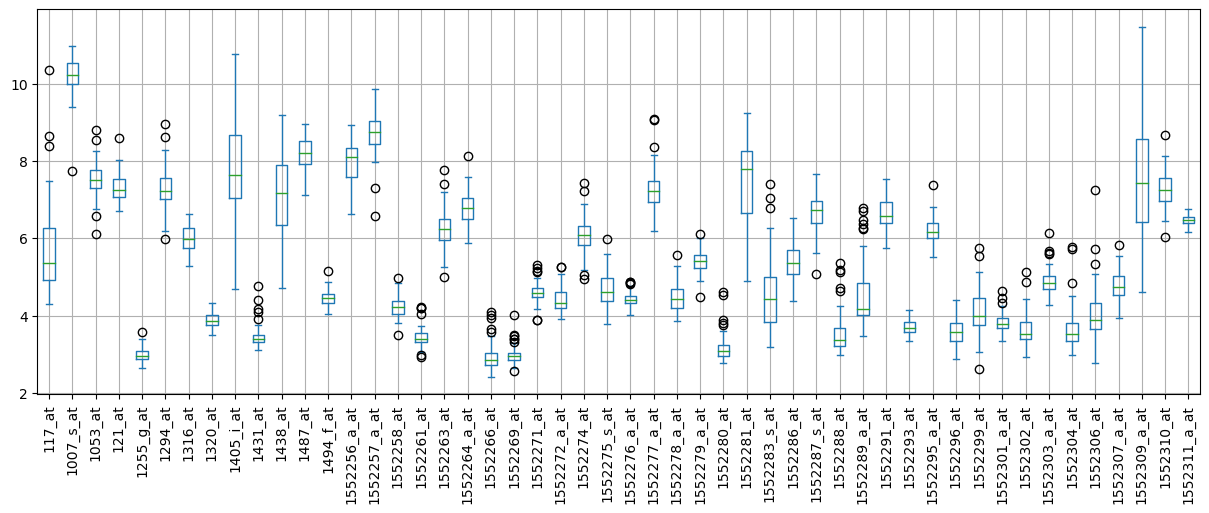

Columns 51 to 100


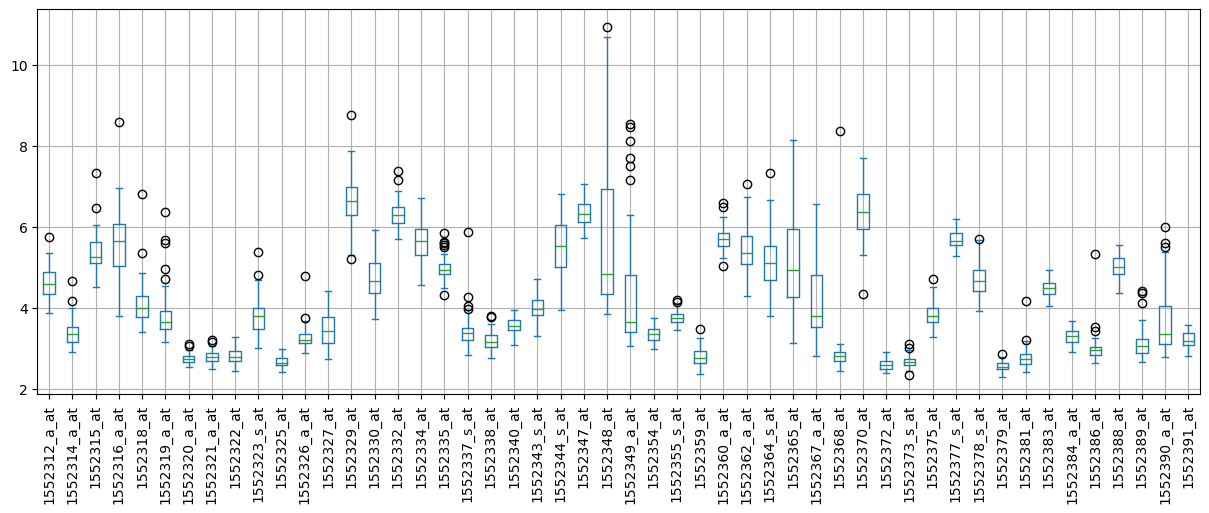

Columns 101 to 150


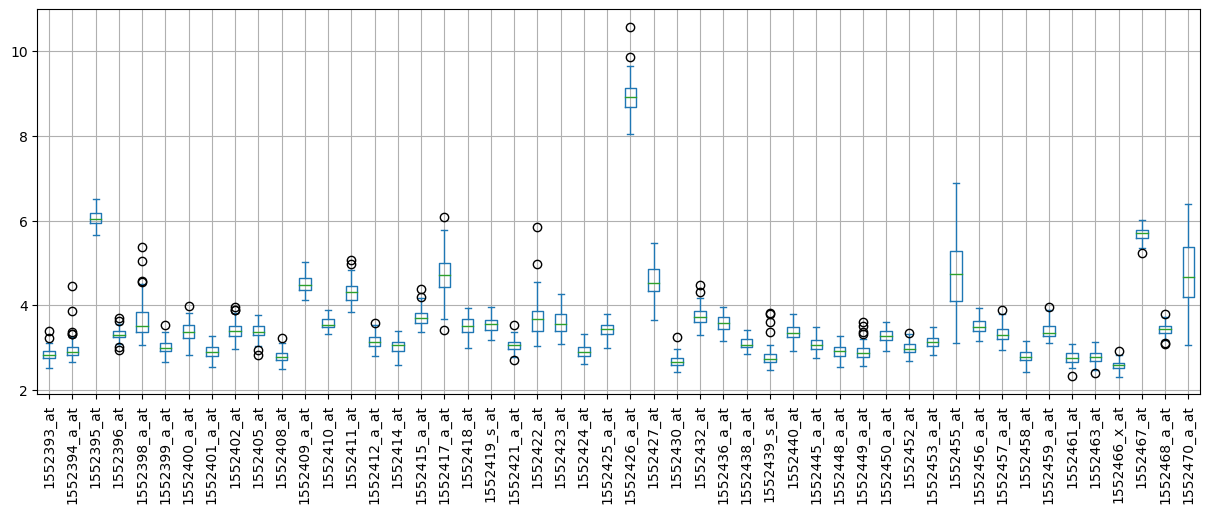

Columns 151 to 200


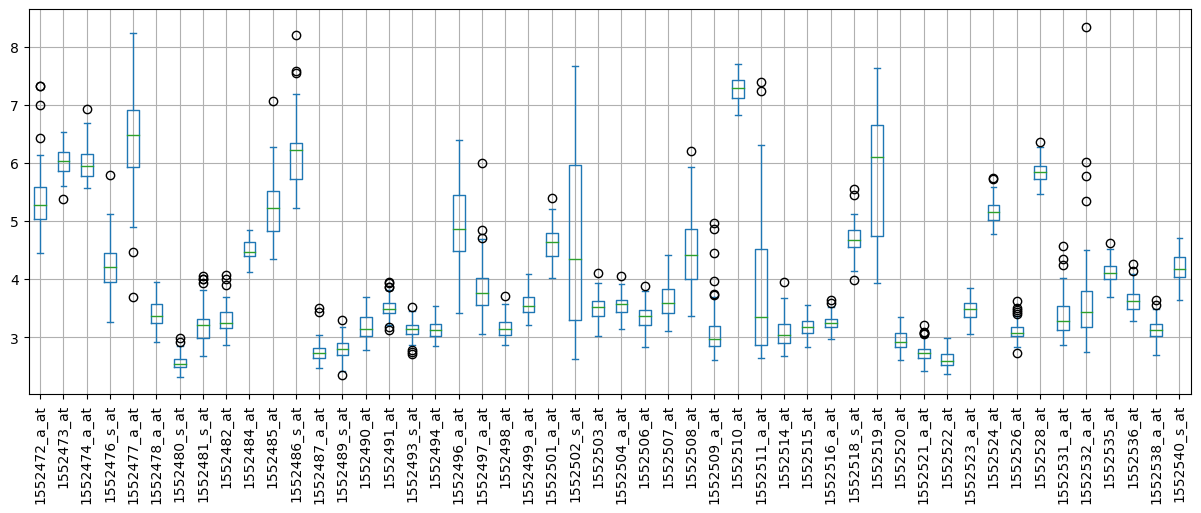

Columns 201 to 250


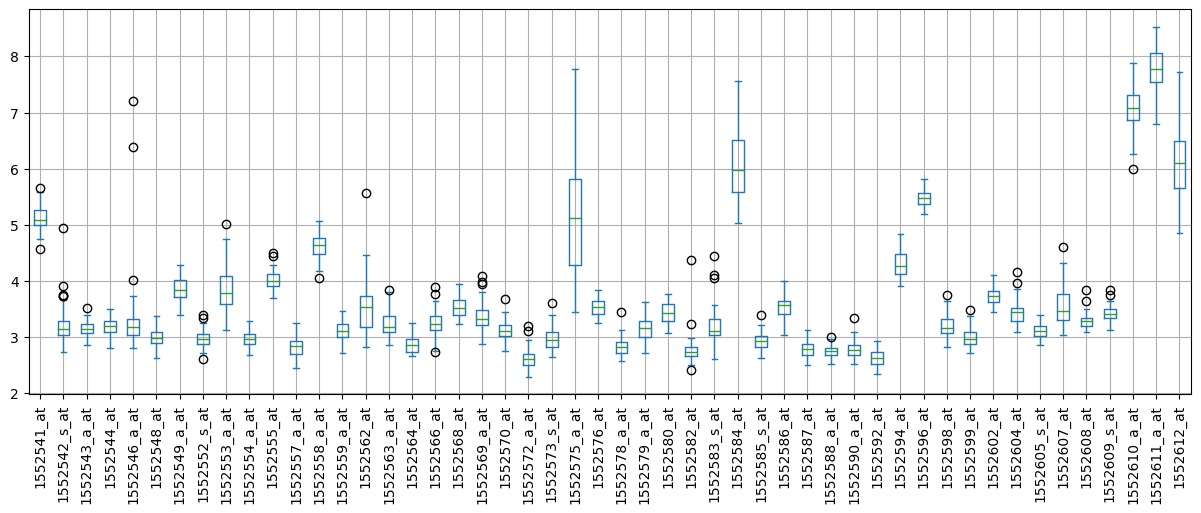

Columns 251 to 300


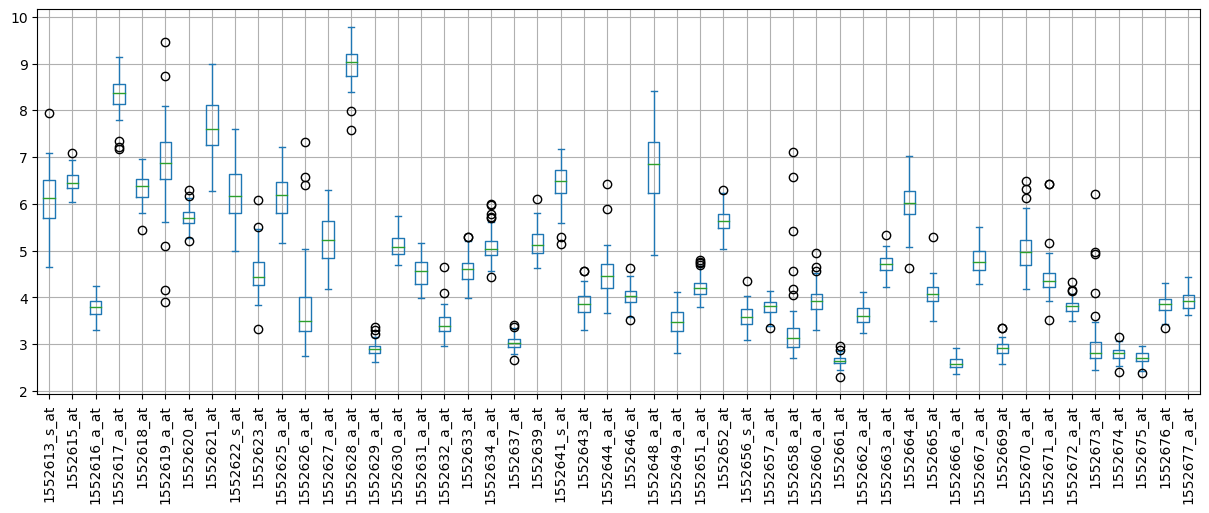

Columns 301 to 350


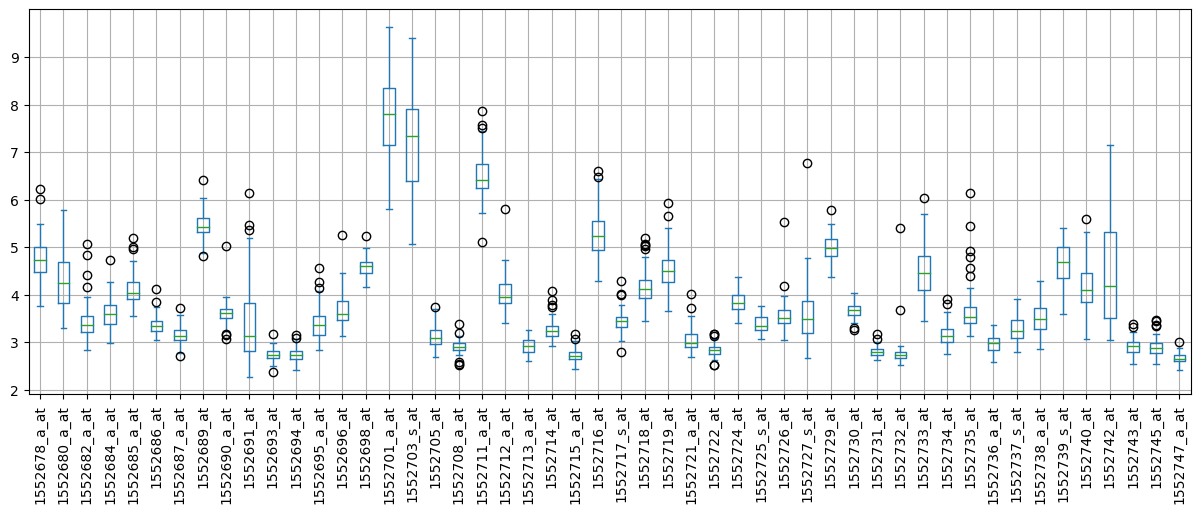

Columns 351 to 400


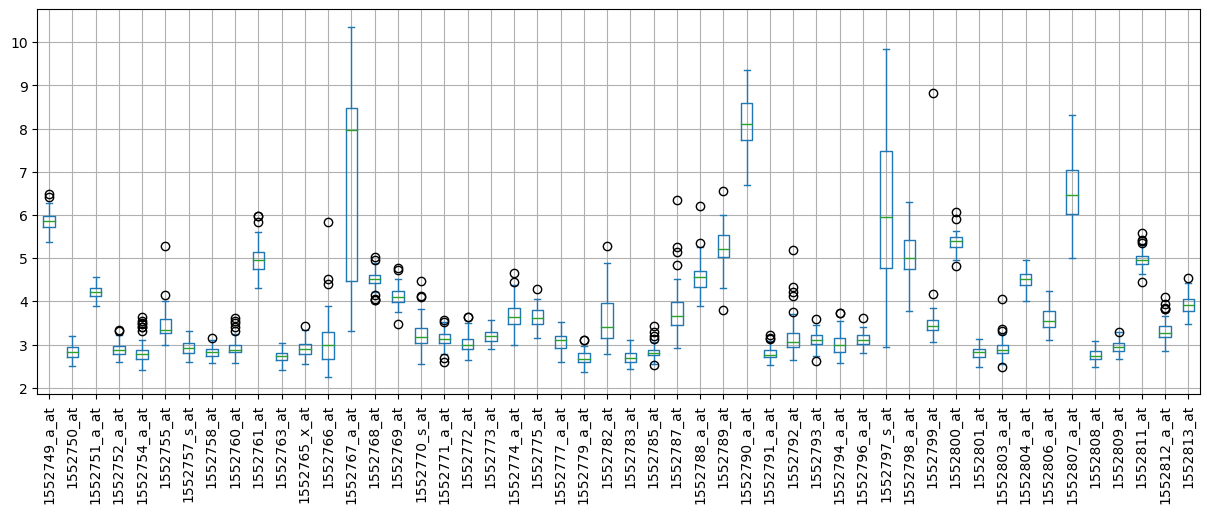

Columns 401 to 450


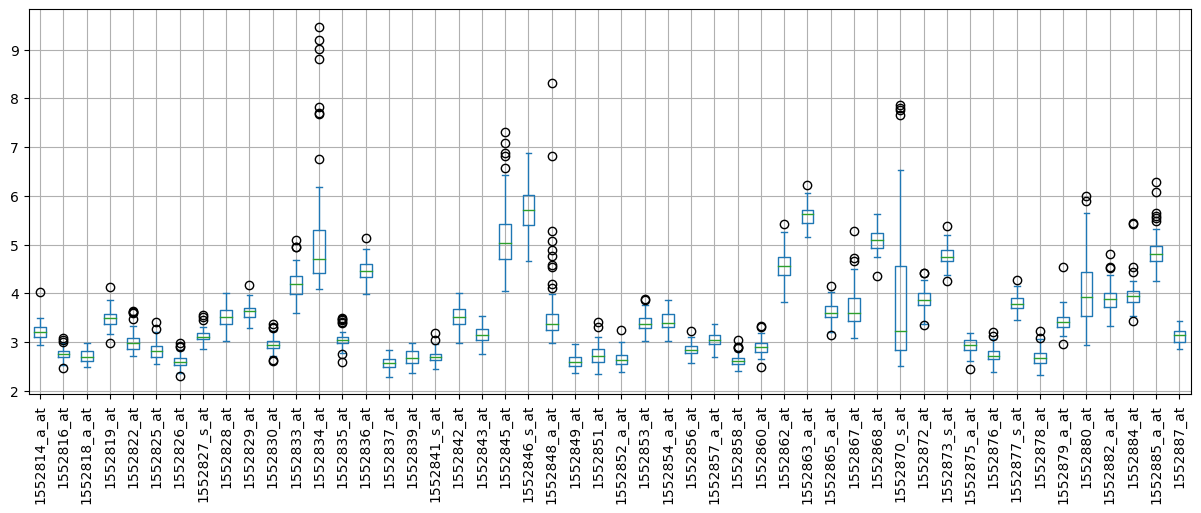

Columns 451 to 500


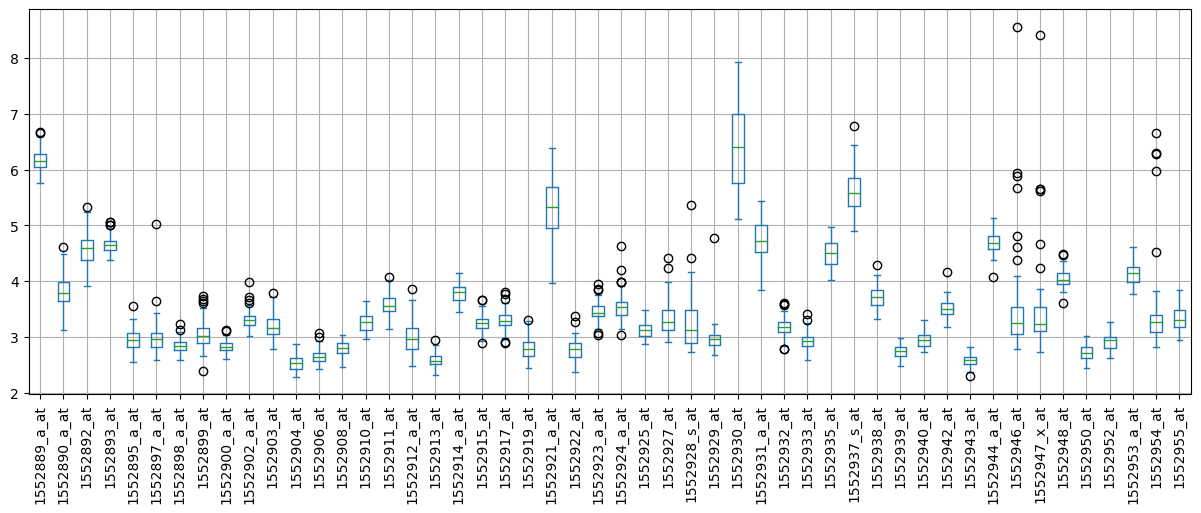

Columns 501 to 550


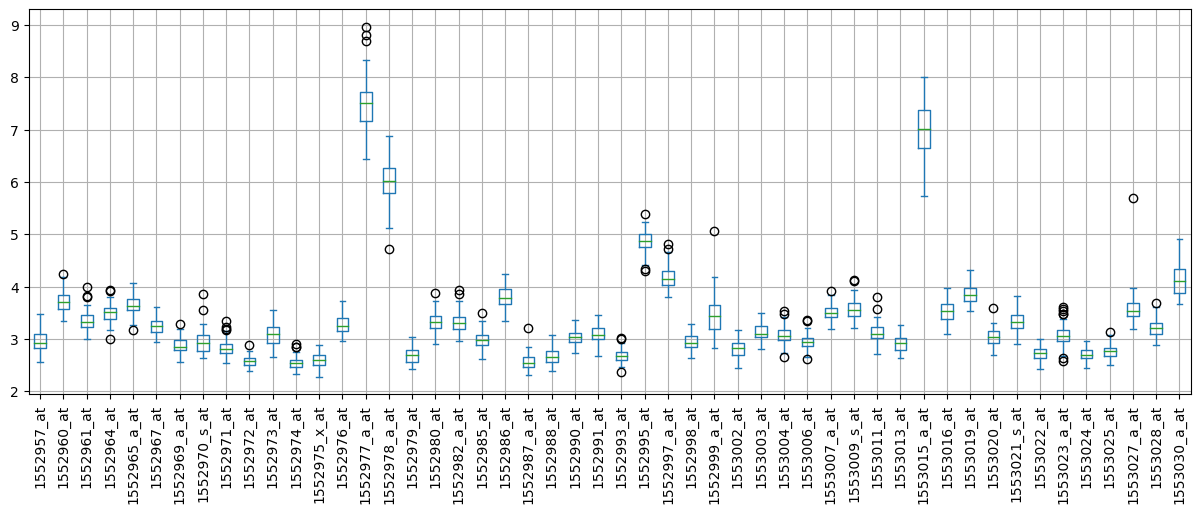

Columns 551 to 600


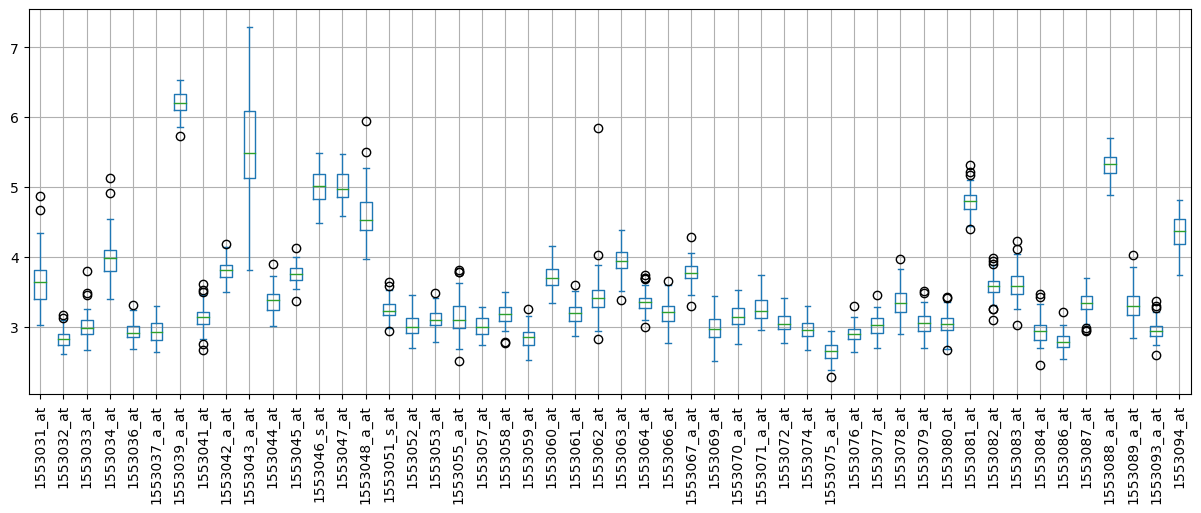

Columns 601 to 650


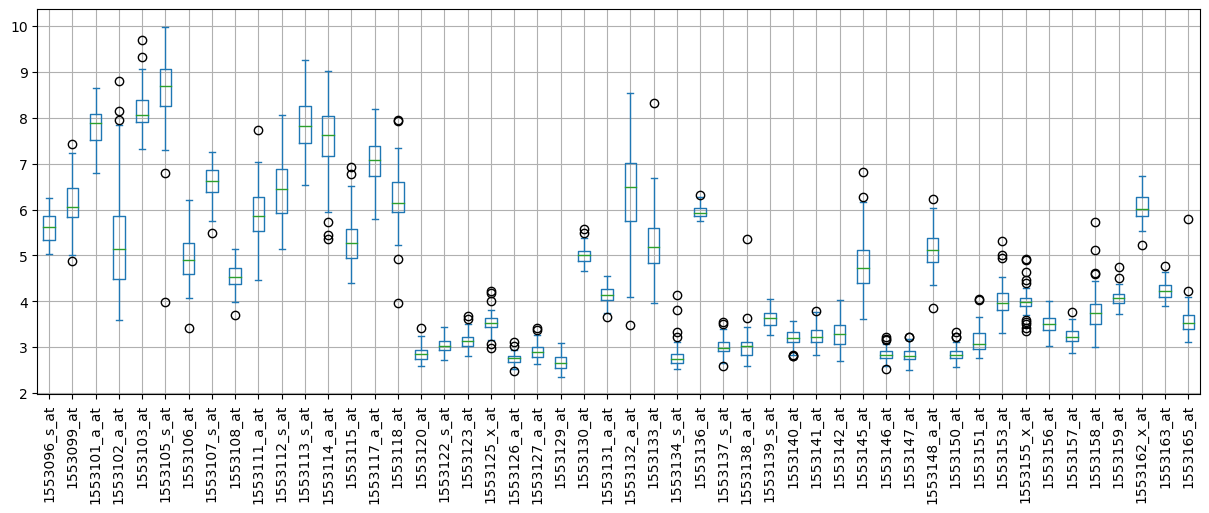

Columns 651 to 700


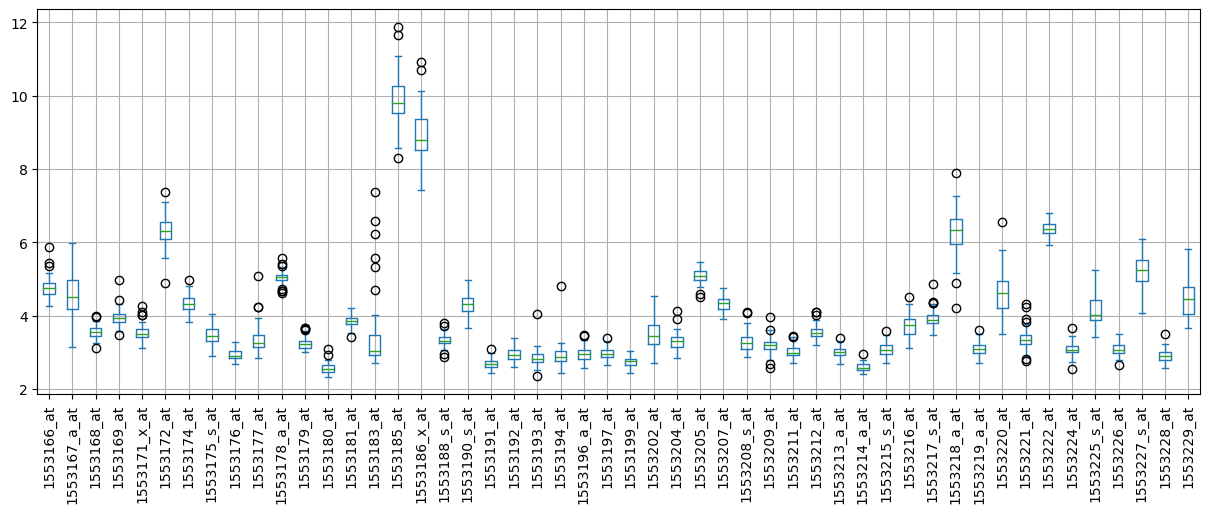

Columns 701 to 750


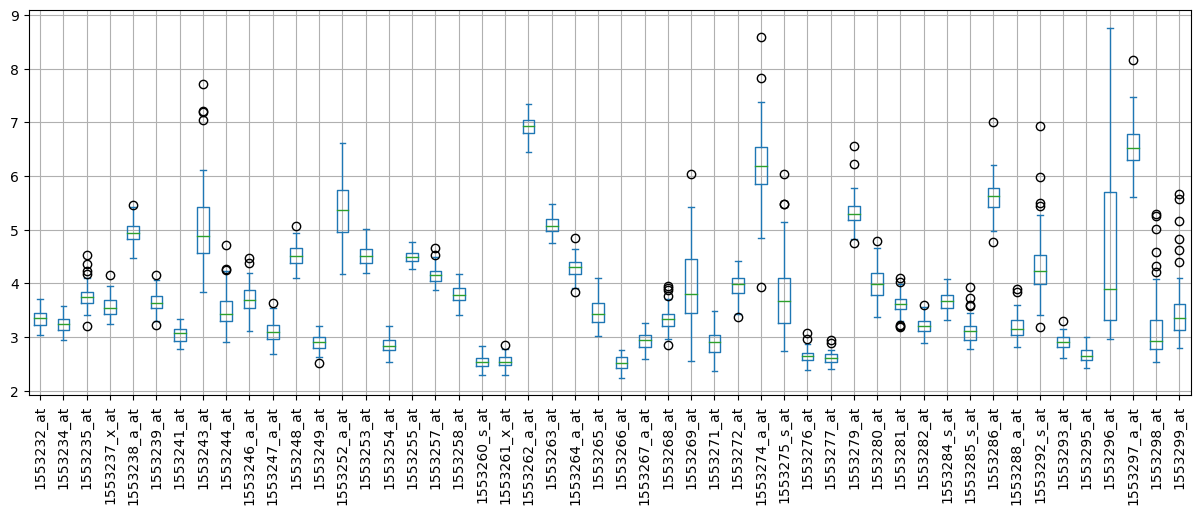

Columns 751 to 800


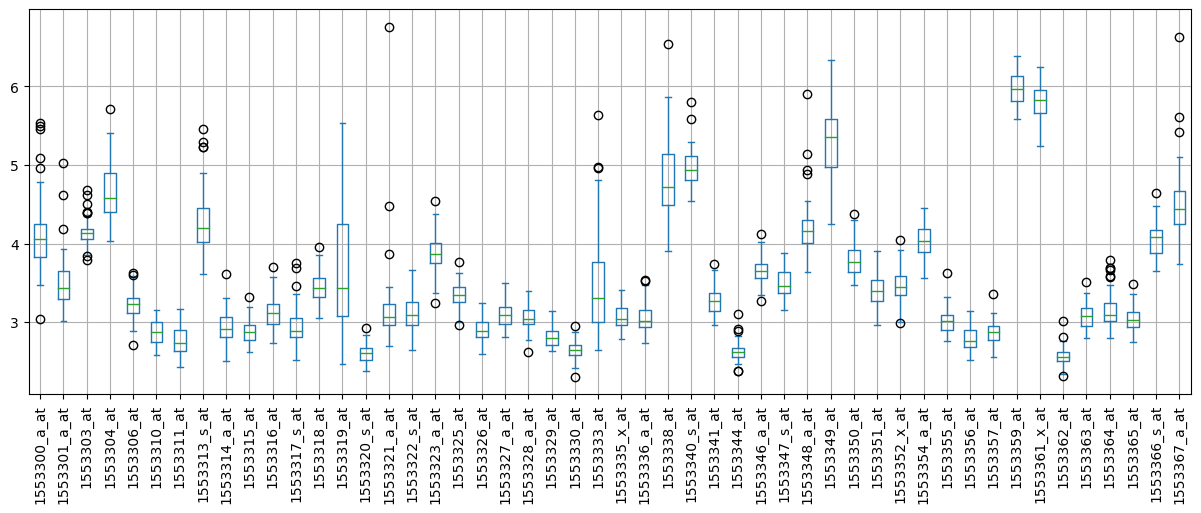

Columns 801 to 850


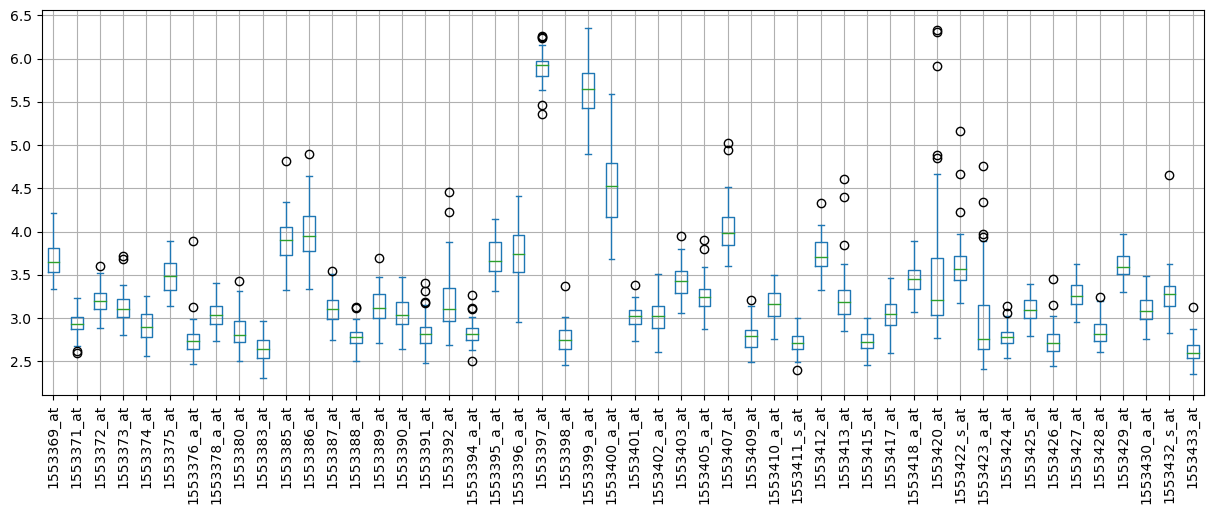

Columns 851 to 900


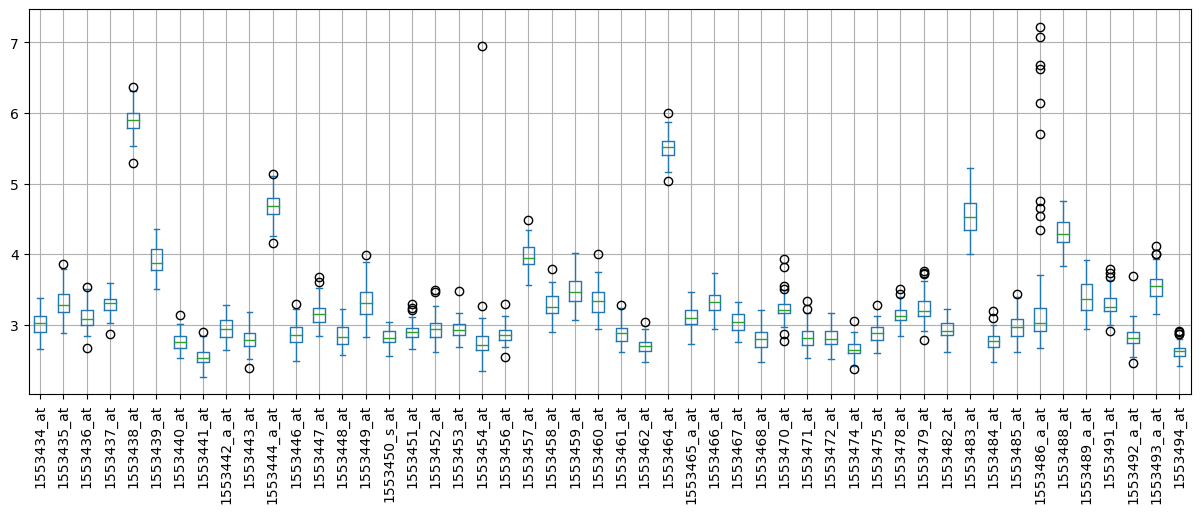

Columns 901 to 950


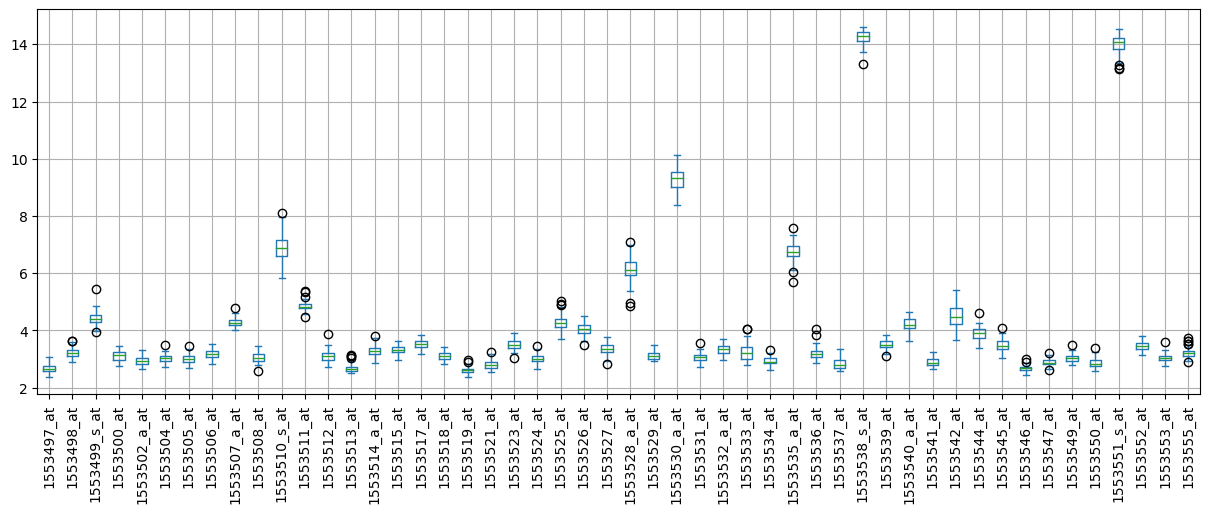

Columns 951 to 1000


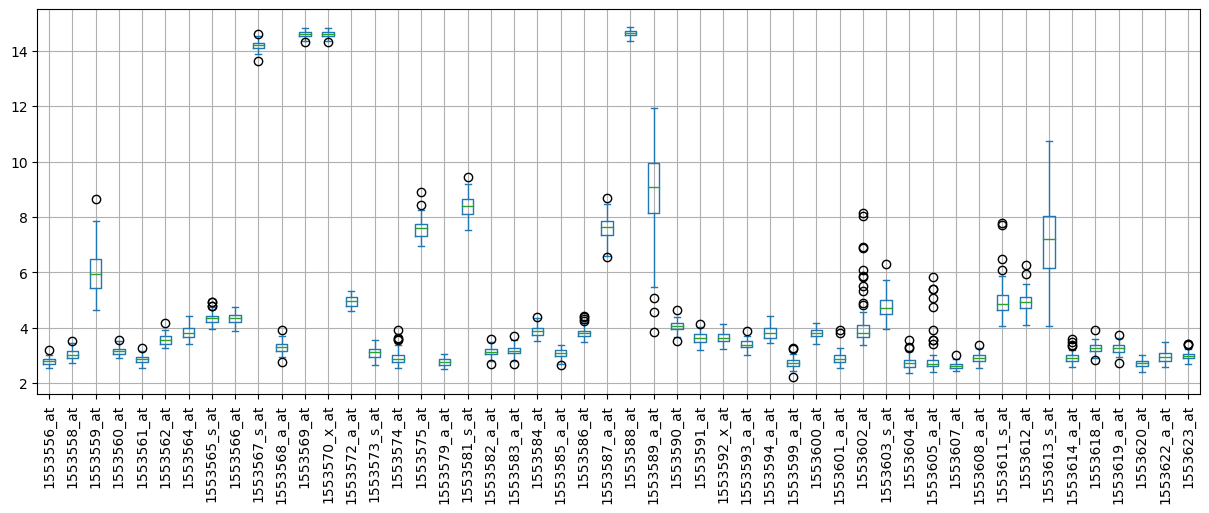

Columns 1001 to 1050


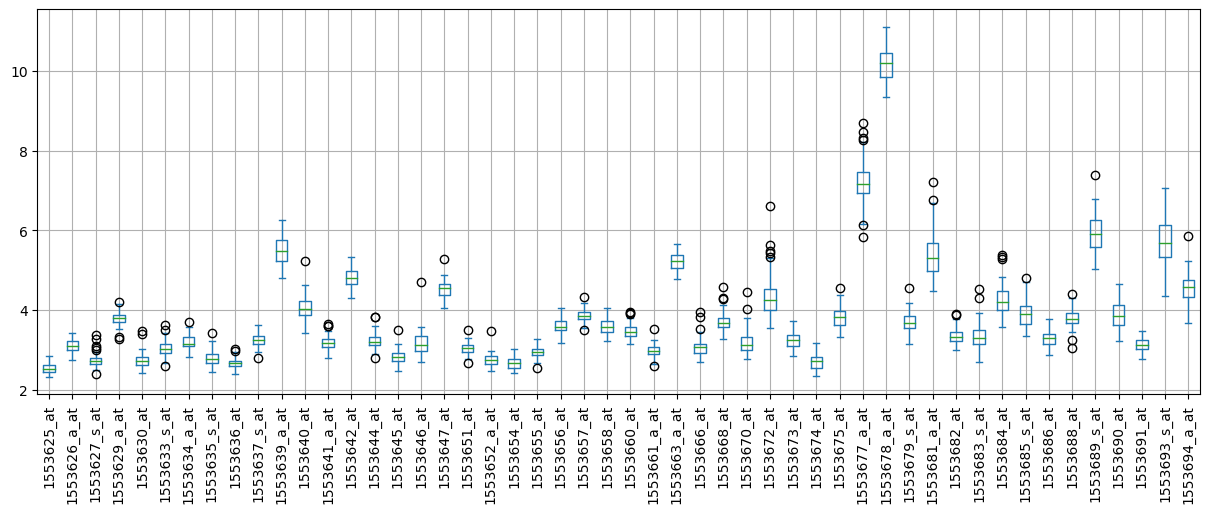

Columns 1051 to 1100


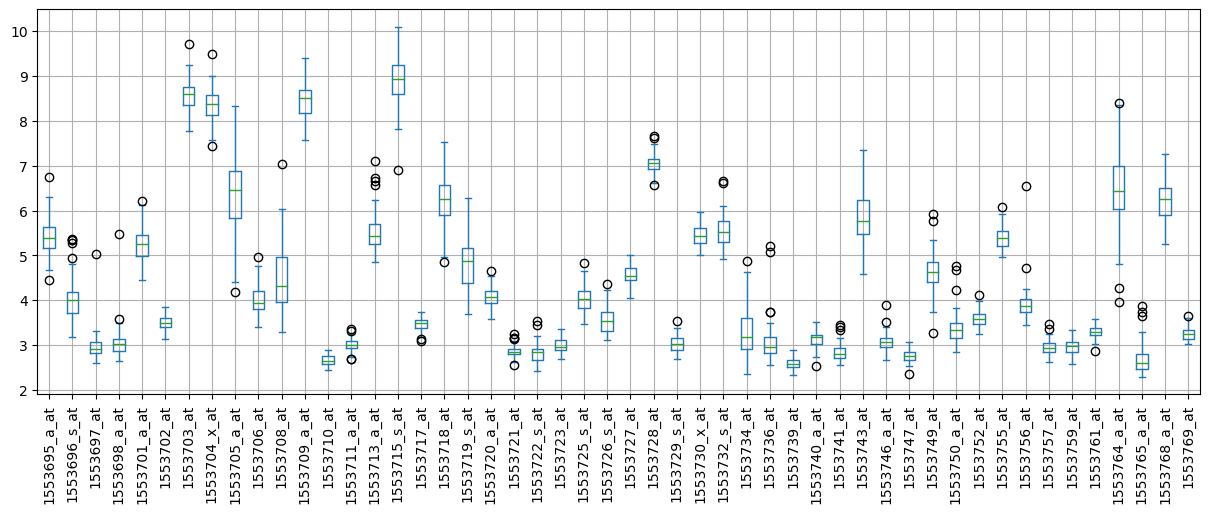

Columns 1101 to 1150


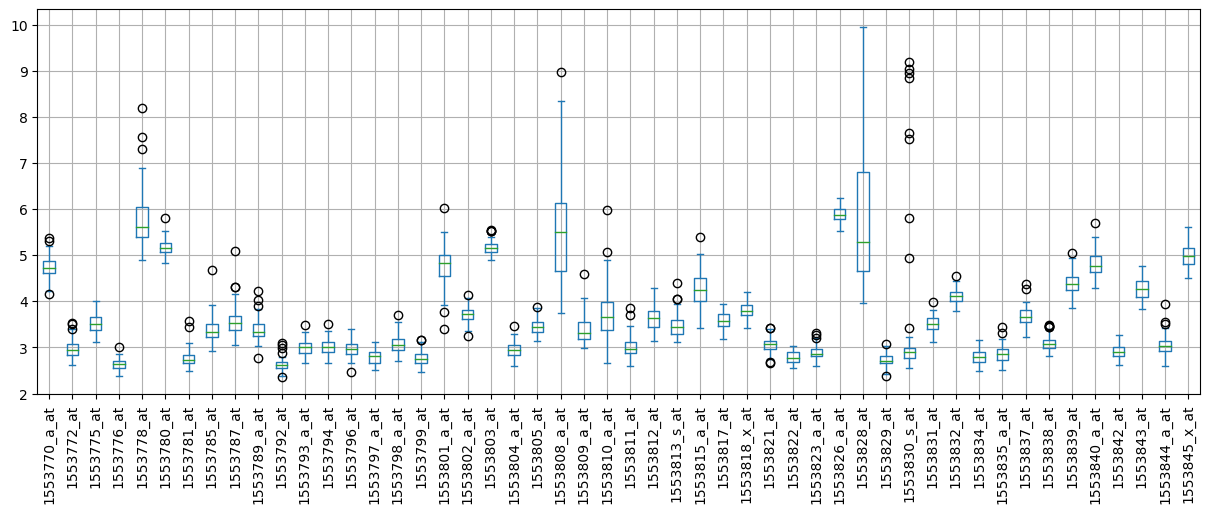

Columns 1151 to 1200


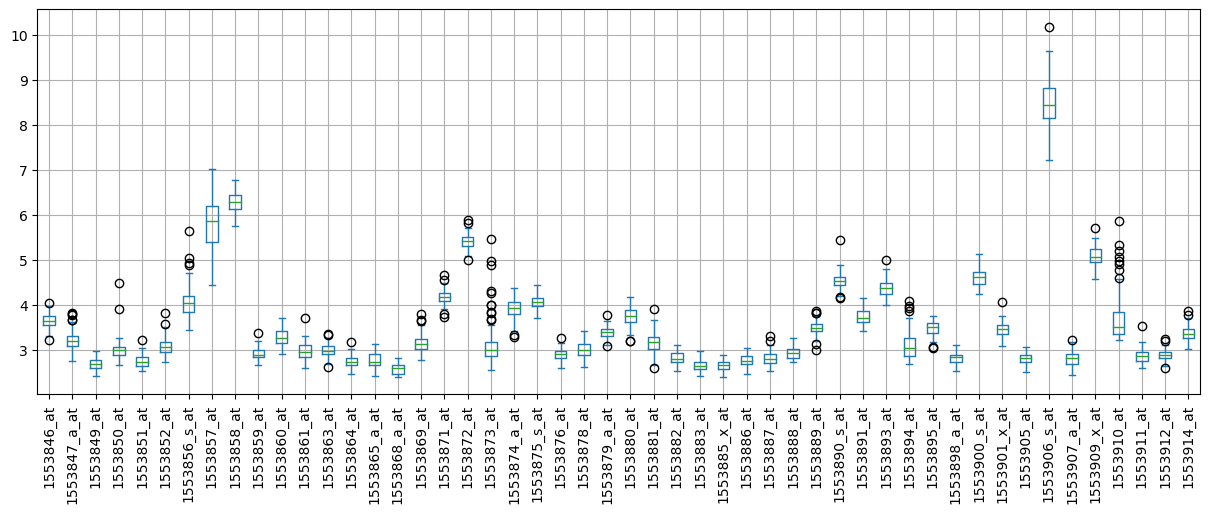

Columns 1201 to 1250


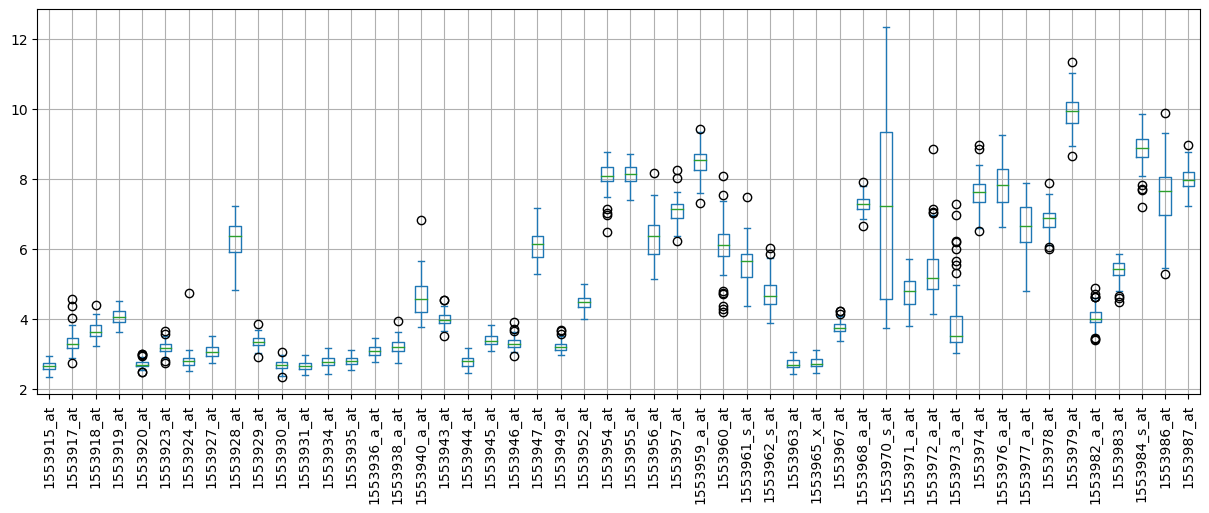

Columns 1251 to 1300


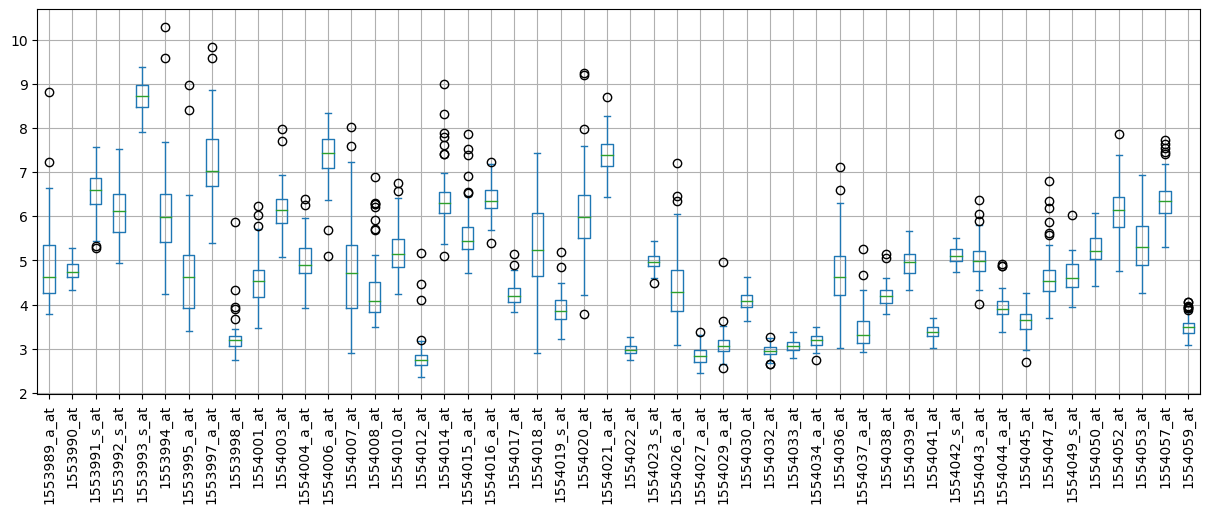

Columns 1301 to 1350


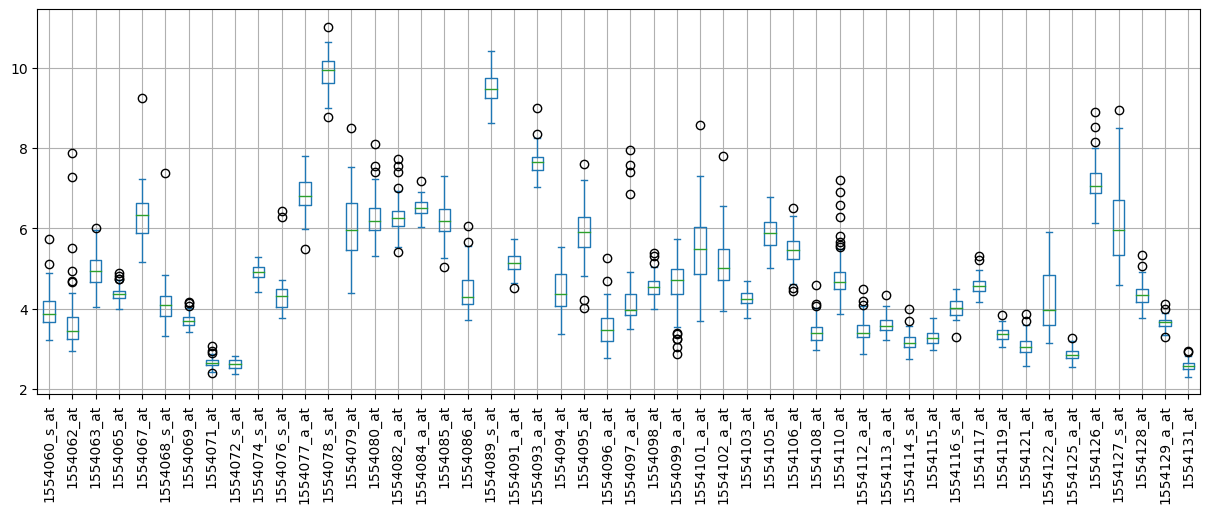

Columns 1351 to 1400


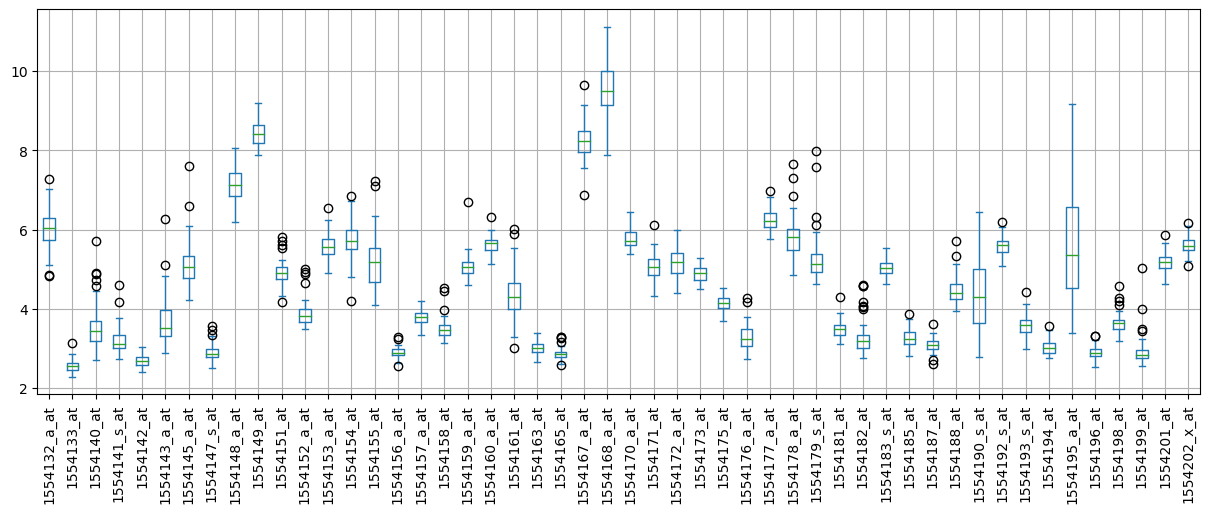

Columns 1401 to 1450


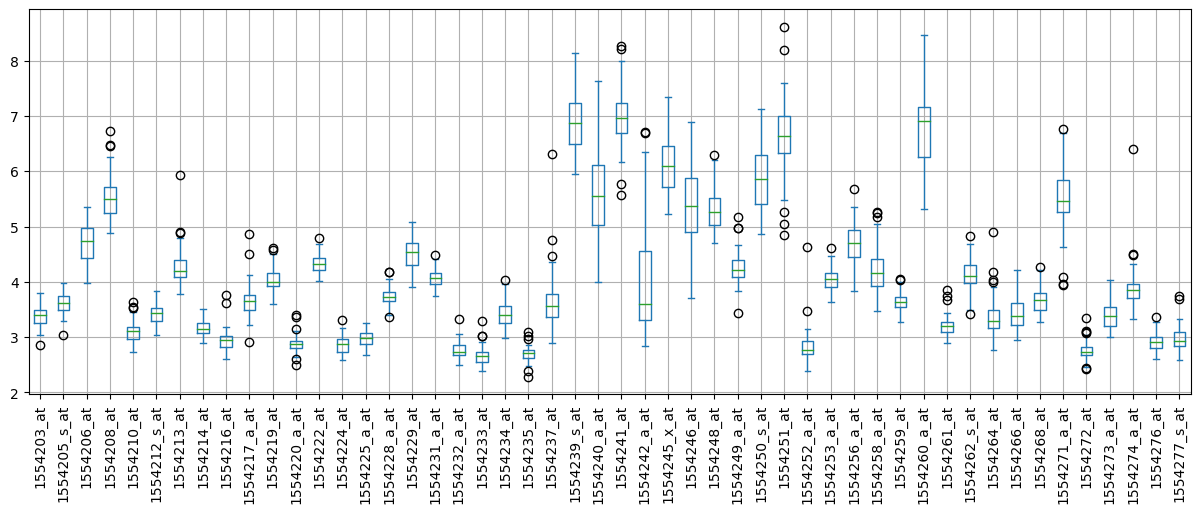

Columns 1451 to 1500


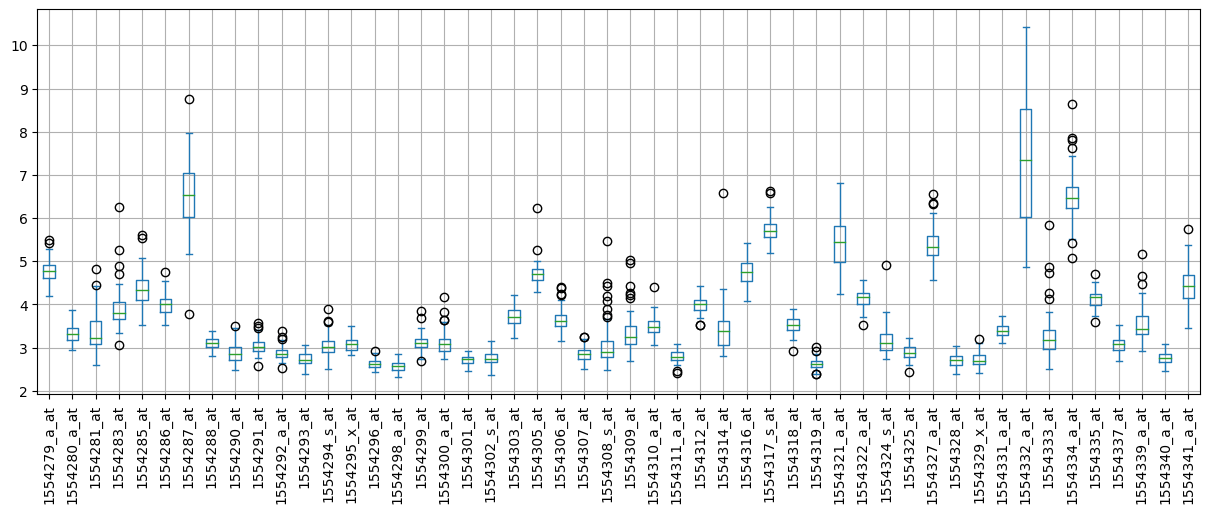

Columns 1501 to 1550


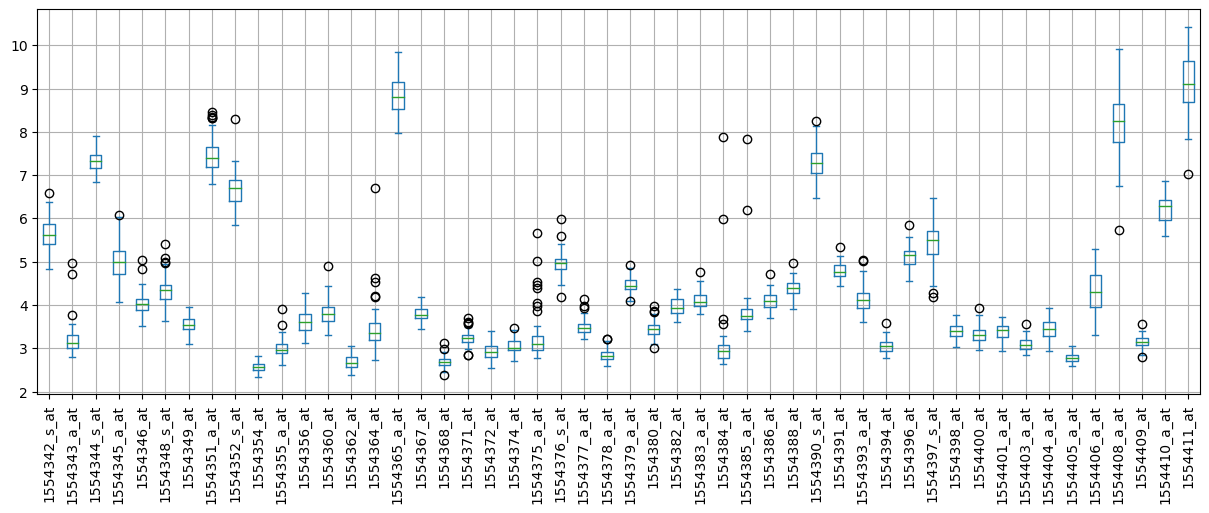

Columns 1551 to 1600


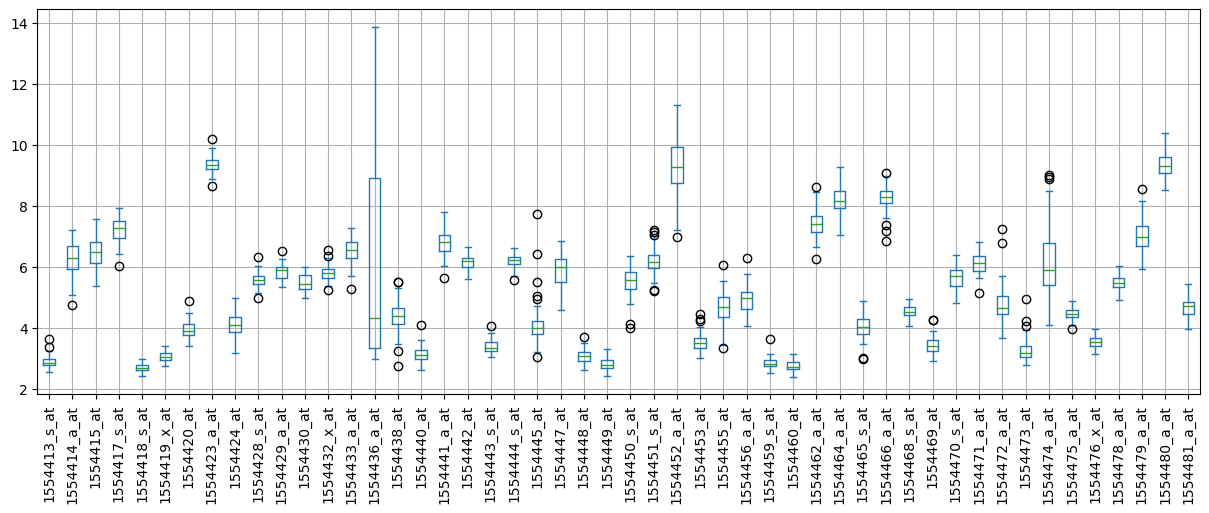

Columns 1601 to 1650


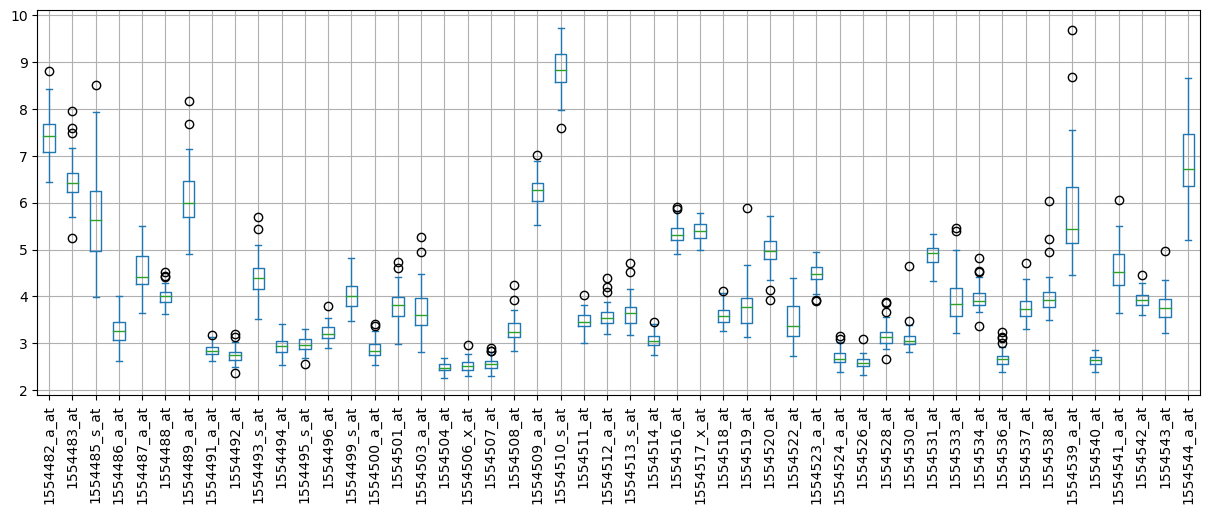

Columns 1651 to 1700


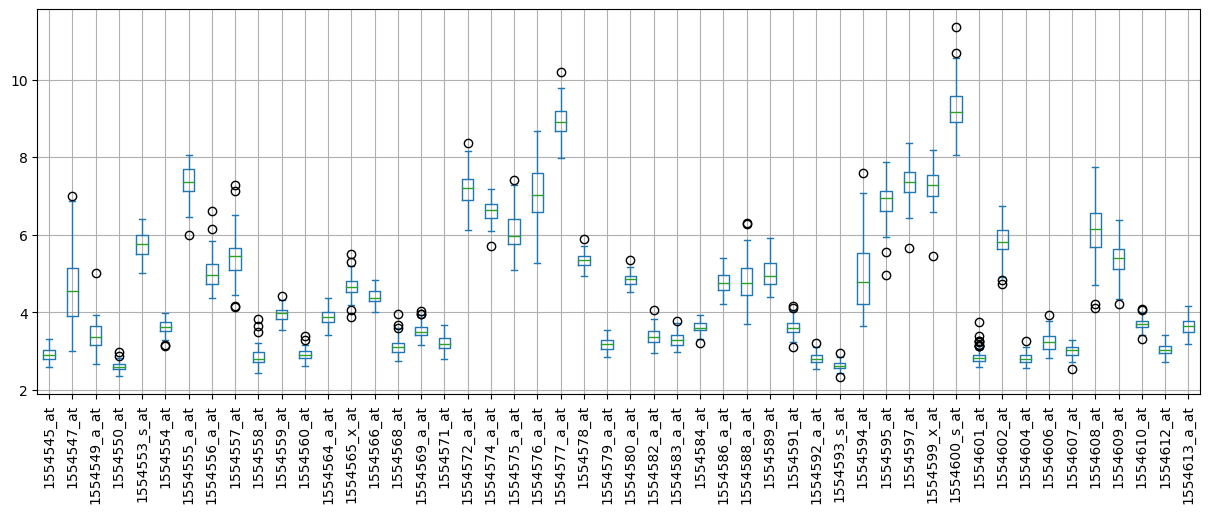

Columns 1701 to 1750


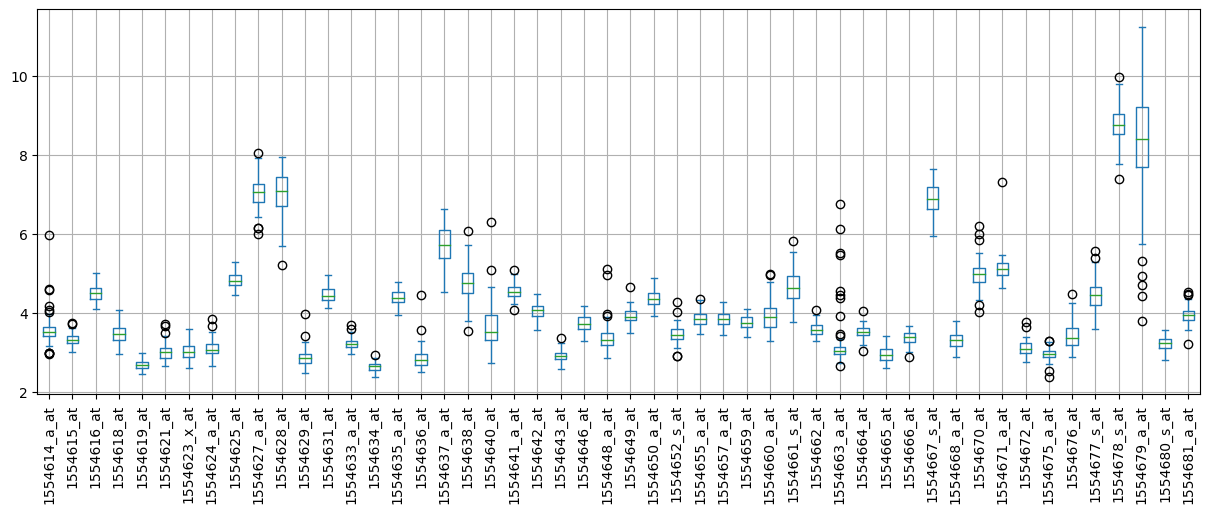

Columns 1751 to 1800


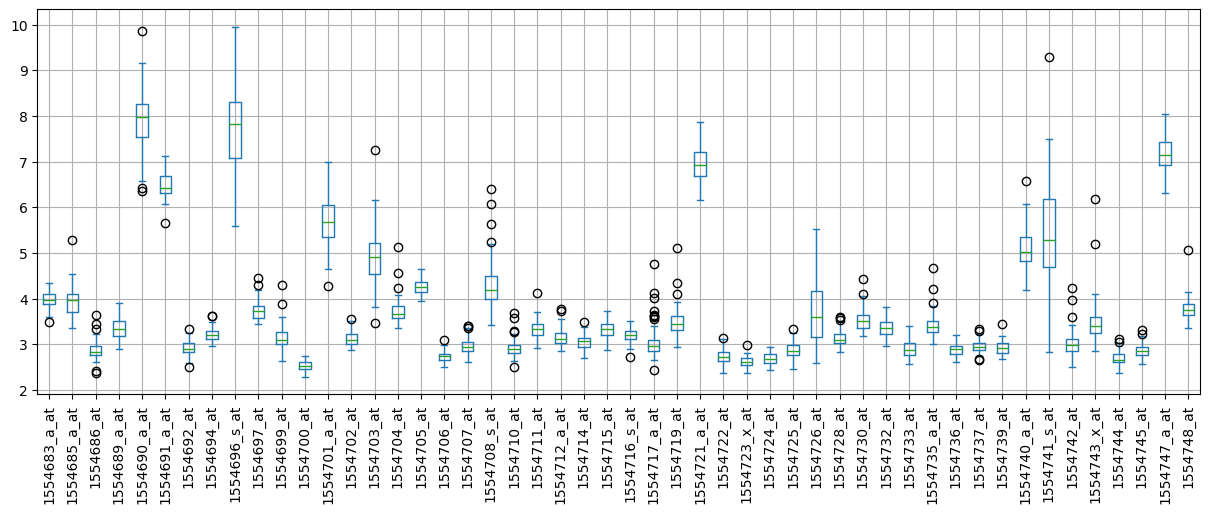

Columns 1801 to 1850


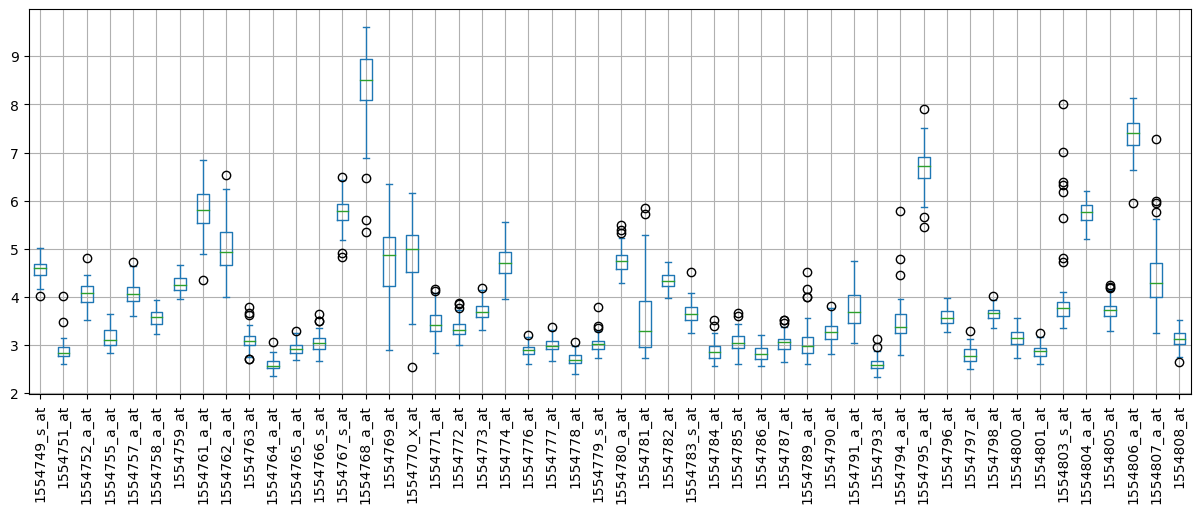

Columns 1851 to 1900


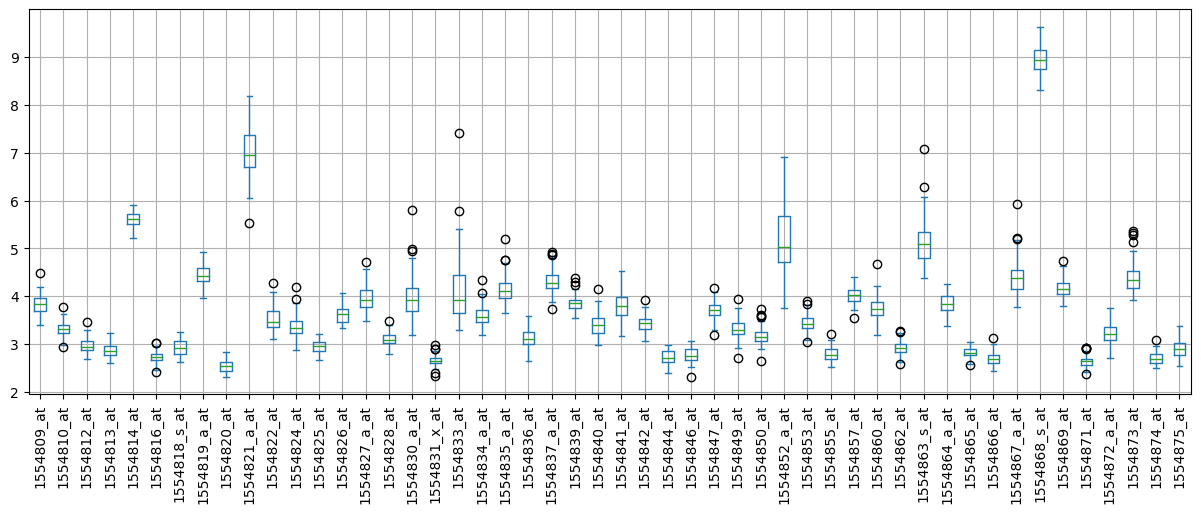

Columns 1901 to 1935


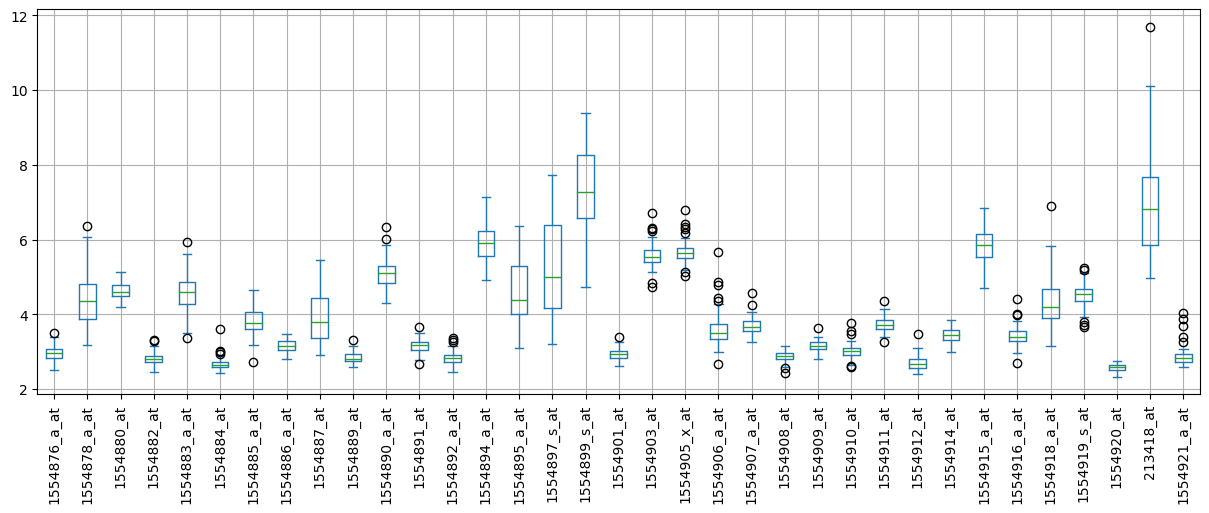

In [18]:
# boxplot of all variables
for i in range(38):
    print('Columns', 50*i+1 , 'to', 50*i+50)
    df_gene.iloc[:,50*i+1:50*i+50+1].plot(kind='box', figsize=(15,5))
    plt.xticks(rotation=90)
    plt.grid()
    plt.show()
    
# separate plot for incomplete last block
print('Columns', 1901 , 'to', 1935)
df_gene.iloc[:,1901:1935+1].plot(kind='box', figsize=(15,5))
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [19]:
# calc correlation matrix
corr_pearson = df_gene[features_gene_num].corr(method='pearson')
# mask lower triangle to avoid redundant values later
corr_pearson = corr_pearson.mask(np.tril(np.ones(corr_pearson.shape)).astype(np.bool))

C:\Users\jpsha\AppData\Local\Temp\ipykernel_4984\1027670543.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_pearson = corr_pearson.mask(np.tril(np.ones(corr_pearson.shape)).astype(np.bool))


In [20]:
# convert matrix in data frame
df_corr = pd.DataFrame(corr_pearson).melt(var_name='x2', 
                                          value_name='corr_p',
                                          ignore_index=False)
df_corr.insert(loc=0, column='x1', value=df_corr.index)

# remove redundancies
df_corr = df_corr[~df_corr.corr_p.isna()]

# reset index
df_corr = df_corr.reset_index(drop=True)

In [21]:
# show result
df_corr

,x1,x2,corr_p
0,117_at,1007_s_at,-0.099369
1,117_at,1053_at,0.080373
2,1007_s_at,1053_at,0.151216
3,117_at,121_at,0.009265
4,1007_s_at,121_at,0.140696
...,...,...,...
1871140,1554916_a_at,1554921_a_at,-0.176734
1871141,1554918_a_at,1554921_a_at,-0.089951
1871142,1554919_s_at,1554921_a_at,-0.062211
1871143,1554920_at,1554921_a_at,-0.019028


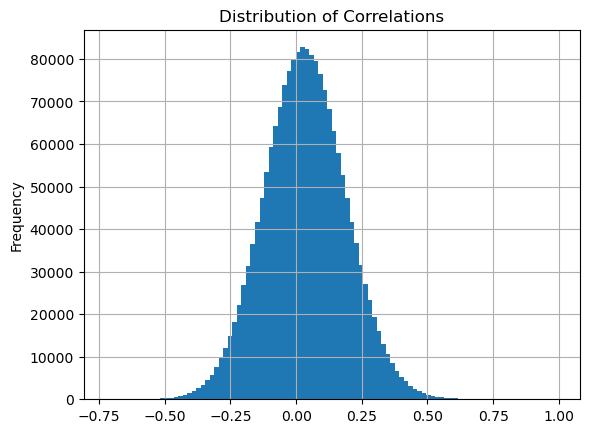

In [22]:
# distribution of correlations
df_corr.corr_p.plot(kind='hist', bins=100)
plt.title('Distribution of Correlations')
plt.grid()
plt.show()

In [23]:
df_corr.nlargest(10, columns='corr_p')

,x1,x2,corr_p
222110,1553185_at,1553186_x_at,0.993569
1832828,1552502_s_at,1554897_s_at,0.981540
2849,1552348_at,1552349_a_at,0.978361
463202,1553569_at,1553570_x_at,0.976309
789395,1553994_at,1553995_a_at,0.975759
559152,1553703_at,1553704_x_at,0.971296
1867278,117_at,213418_at,0.971157
121770,1552946_at,1552947_x_at,0.967980
3485,1552365_at,1552367_a_at,0.961934
33410,1552621_at,1552622_s_at,0.957498


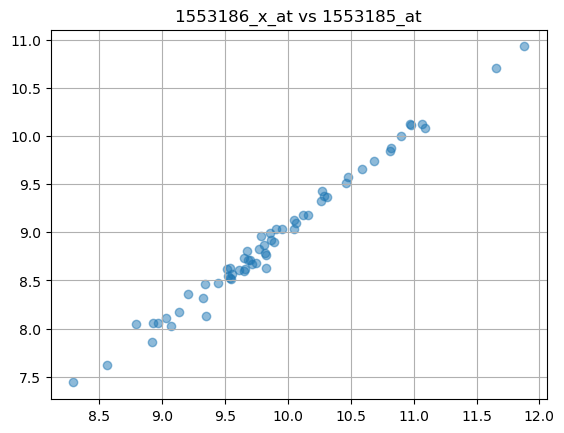

In [24]:
# show example plot
v1 = '1553185_at'
v2 = '1553186_x_at'
plt.scatter(df_gene[v1],df_gene[v2],alpha=.5)
plt.title(v2+' vs '+v1)
plt.grid()
plt.show()

In [25]:
df_corr.nsmallest(10, columns='corr_p')

,x1,x2,corr_p
182805,1552386_at,1553105_s_at,-0.723270
1646161,1554710_at,1554768_a_at,-0.693298
183047,1552732_at,1553105_s_at,-0.691860
1368305,1554021_a_at,1554553_s_at,-0.663442
796884,1553906_s_at,1554006_a_at,-0.659891
1473788,1553101_a_at,1554637_a_at,-0.656045
280156,1552281_at,1553299_at,-0.655680
1395338,1552316_a_at,1554576_a_at,-0.650848
882321,1553906_s_at,1554101_a_at,-0.643997
1648038,1552264_a_at,1554770_x_at,-0.643960


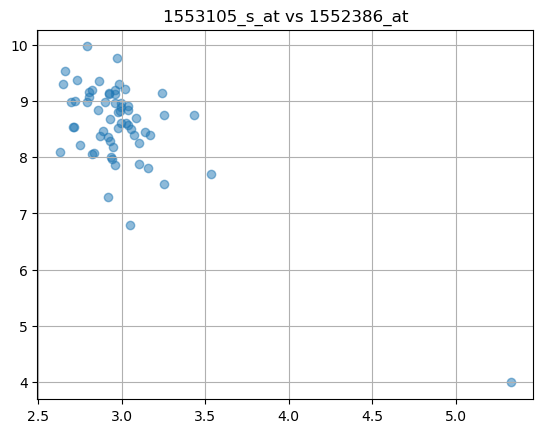

In [26]:
v1 = '1552386_at'
v2 = '1553105_s_at'
plt.scatter(df_gene[v1],df_gene[v2],alpha=.5)
plt.title(v2+' vs '+v1)
plt.grid()
plt.show()

In [27]:
df_combined = df.join(other=df_gene.set_index('ID_REF'), on='ID_REF', how='left')

In [28]:
df_combined

,ID_REF,Age (in years),Dukes Stage,Gender,Location,DFS (in months),DFS event,Adj_Radio,Adj_Chem,117_at,...,1554911_at,1554912_at,1554914_at,1554915_a_at,1554916_a_at,1554918_a_at,1554919_s_at,1554920_at,213418_at,1554921_a_at
0,GSM877126,62.0,A,Male,Left,108.0,0.0,1.0,0.0,6.029834,...,3.504809,2.856109,3.130712,5.603126,3.091348,4.009692,4.350400,2.512026,7.494499,4.030978
1,GSM877127,77.0,B,Male,Left,40.0,1.0,1.0,0.0,6.344321,...,3.957833,2.988643,3.484177,6.601744,3.141737,4.679732,4.508760,2.427697,8.156995,2.827090
2,GSM877128,66.0,C,Female,Left,49.0,0.0,1.0,0.0,5.023127,...,3.749518,2.610840,3.406207,6.003205,3.469987,4.781843,4.435054,2.531300,6.058687,2.930454
3,GSM877129,72.0,D,Female,Left,45.0,0.0,1.0,1.0,4.612727,...,3.610429,2.728274,3.534871,5.858326,3.372291,3.653575,5.014994,2.608755,5.488072,2.949848
4,GSM877130,75.0,C,Male,Left,40.0,0.0,0.0,1.0,5.865944,...,3.520434,2.664744,3.314746,5.388115,3.322147,4.666360,5.013006,2.657130,7.410725,3.054697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,GSM877184,54.0,C,Male,Left,22.0,1.0,0.0,0.0,4.835558,...,3.637413,2.787781,3.519436,6.026848,3.404074,4.103411,4.303329,2.422700,6.072618,2.853109
58,GSM877185,48.0,D,Male,Right,64.0,0.0,1.0,0.0,5.694010,...,3.733335,3.473473,3.237316,6.167214,3.452096,4.724017,4.470426,2.634358,7.175365,2.667533
59,GSM877186,65.0,C,Male,Left,25.0,1.0,1.0,0.0,8.661629,...,3.436002,2.706722,3.349033,6.238026,3.109042,6.897634,3.797626,2.756086,10.121831,2.971542
60,GSM877187,71.0,A,Male,Rectum,58.0,1.0,1.0,0.0,5.702601,...,3.438260,2.539084,3.334590,5.842051,3.496104,4.883845,4.661893,2.581452,7.232090,2.719928
